<a href="https://colab.research.google.com/github/shwe-hg/capston-project-on-classification/blob/main/project_on_classification(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEALTH INSURANCE CROSS SELL PREDICTION**

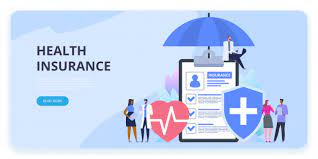

## **Problem Statement** :

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.



### **Dataset Description** :



1.**id** : Unique ID for the customer

2.**Gender**: Gender of the customer

3.**Age** : Age of the customer

4.**Driving_License** : 0=Customer does not have DL, 1= Customer already has DL

5.**Region_Code** : Unique code for the region of the customer

6.**Previously_Insured :** 1= Customer already has Vehicle Insurance, 0= Customer doesn't have Vehicle Insurance

7.**Vehicle_Age** : Age of the Vehicle

8.**Vehicle_Damage** : 1= Customer got his/her vehicle damaged in the past. 0= Customer didn't get his/her vehicle damaged in the past.

9.**Annual_Premium**: The amount customer needs to pay as premium in the year

10.**PolicySalesChannel** : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11.**Vintage** : Number of Days, Customer has been associated with the company

12.**Response** : 1 : Customer is interested, 0 : Customer is not interested

Total no' of rows are 381109 .
Total no' of colums are 12 .

### **Introduction** :

###**Importing Libraries** :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import classification_report


# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Reading Dataset** :

In [2]:
df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')


###**Data Wrangling**: 

**Data wrangling is data cleaning or preprocessing, which refers to cleaning, transforming, and preparing raw data to make it suitable for analysis.**

let's have a look at dataset :


In [3]:
#first 5 rows of dataset .
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#last 5 rows of dataset 
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [5]:
# describe will give the summary statistics for numerical columns in a DataFrame
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
# the information of rows and columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
#info about columns 
df.columns 

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
# shape of dataset
df.shape

(381109, 12)

In [9]:
# making a copy of dataset so that original dataset remain unchanged.
df1=df.copy()

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


#### **Checking the duplicate values** :

In [11]:
d_value=df1[df1.duplicated()].shape
print("the no of duplicate values is",d_value)

the no of duplicate values is (0, 12)


**We found that there is no duplicate values in the above dataset .**

####**Missing values / Null values** :

In [12]:
df1.isnull()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df1.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**We found that there is no null values in the dataset .**

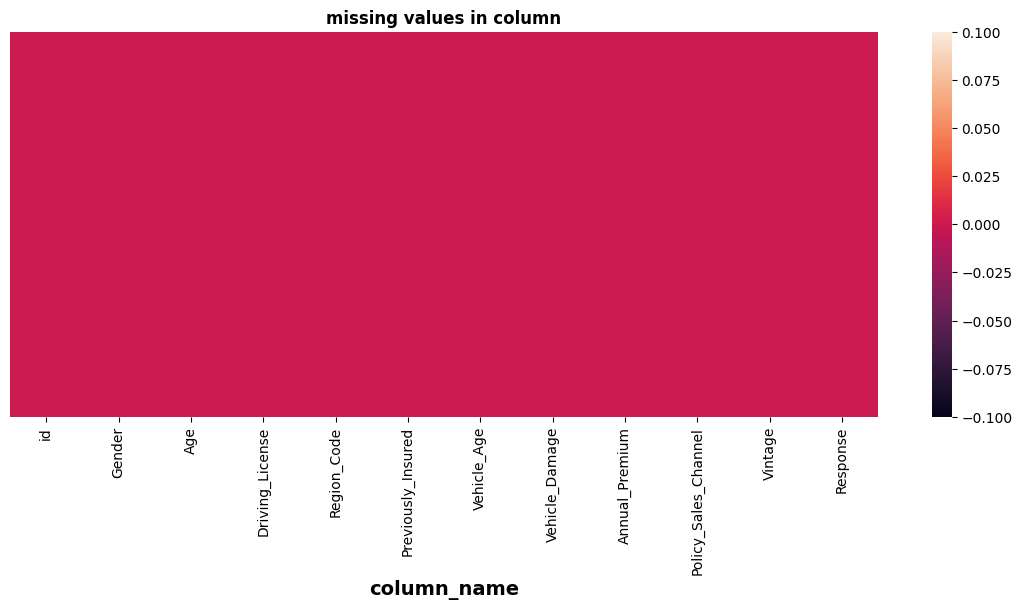

In [14]:
# heatmap for missing values .
plt.figure(figsize=(14, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=12)
plt.show()


**The above heatmap is for missing values present in dataset .**

####**Getting the data type of dataset .**

In [15]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [16]:
# statistical info
df1.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


**describe() will give the statistical information of dataset.**

#**Data visualizations**

##**Age**

<Axes: >

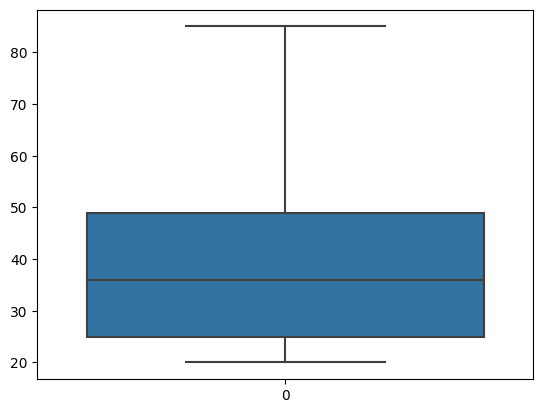

In [17]:
sns.boxplot(df1['Age'])

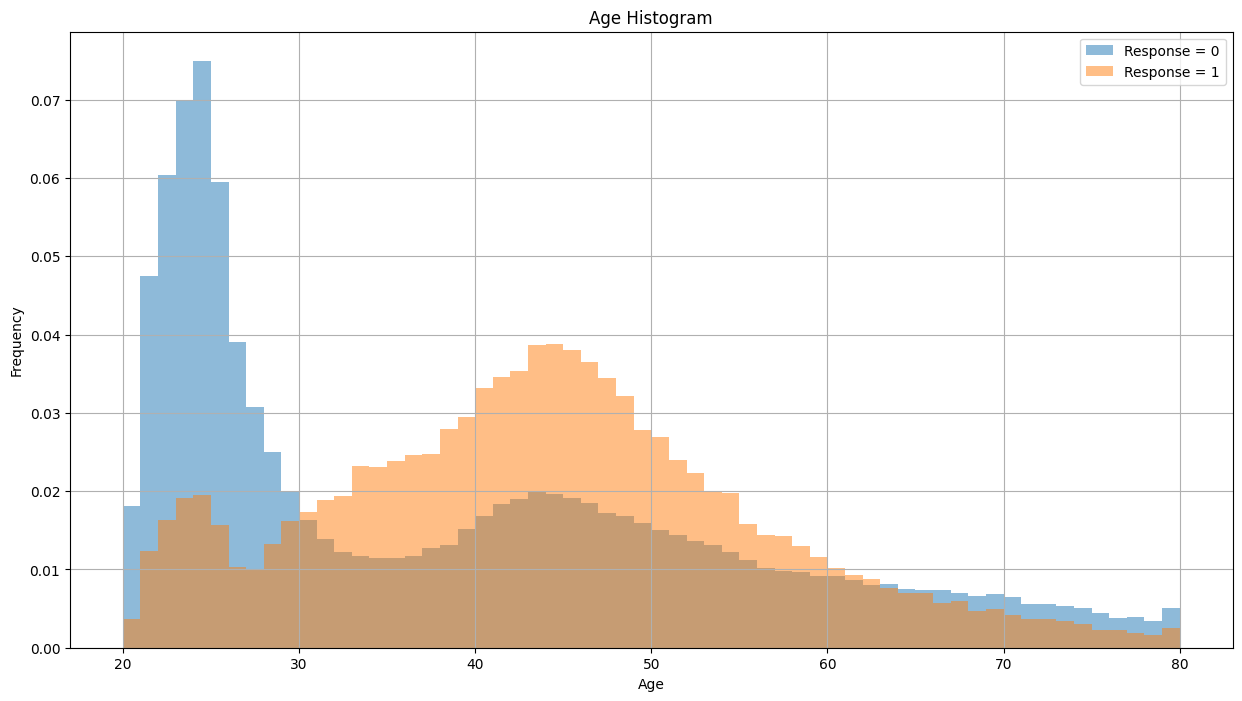

In [18]:
plt.figure(figsize = (14,6))
df1.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

**conclusion**




<Axes: >

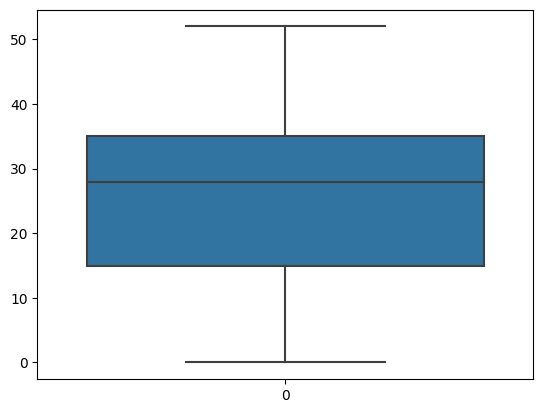

In [19]:
sns.boxplot(df1['Region_Code'])

**Target variable**.

<Axes: ylabel='count'>

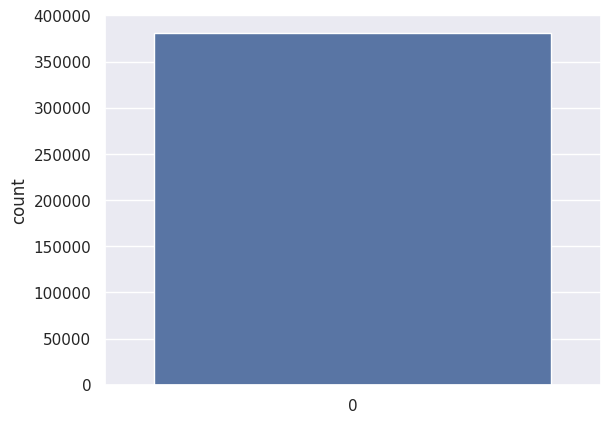

In [20]:
sns.set_theme(style="darkgrid")
sns.countplot(df1['Response'])

##**Response**

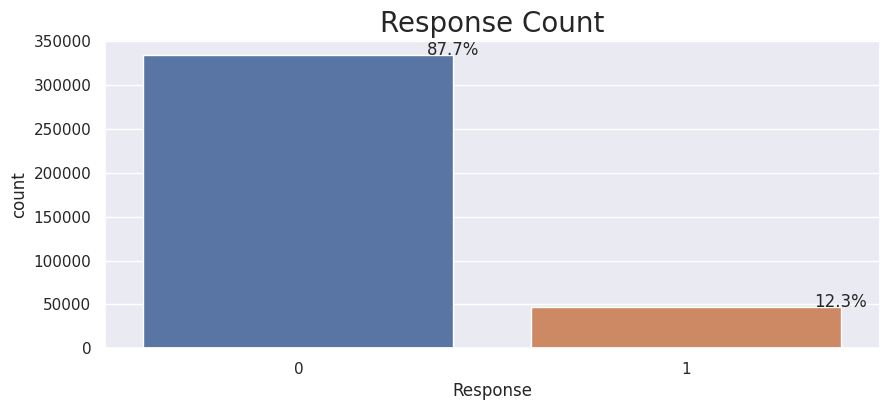

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,4))
total = float(len(df1))
ax = sns.countplot(x='Response', data=df1)
plt.title('Response Count', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

###**conclusion**



**As it seems majority of people are not interested i.e 87.7% and interested ratio is just 12.3% .**

##**Gender variable**


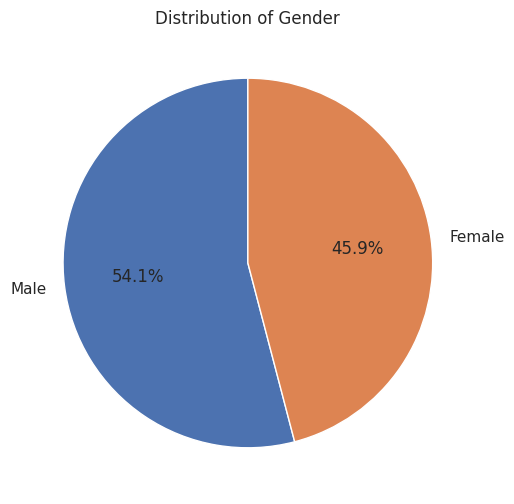

In [22]:
plt.figure(figsize=(8, 6))

# Calculate the count of each gender category
gender_counts = df1['Gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add title and legend
plt.title('Distribution of Gender')

# Show the plot
plt.show()


###**conclusion**


**From the pie chart we can conclude that male ratio is slightly higher than the female.**

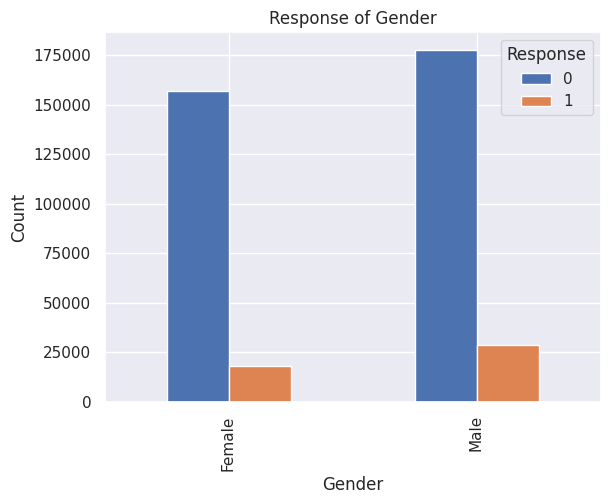

In [23]:
import matplotlib.pyplot as plt

# Calculate the count of each gender and response category
gender_response_counts = df1.groupby(['Gender', 'Response']).size().unstack()

# Plot the grouped bar plot
gender_response_counts.plot(kind='bar')

# Customize the plot
plt.title('Response of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


###**conclusion**




**we can say the ratio of people which are not interested is much higher than the people who are interested.**

**As we can clearly see from the graph male ratio is high as compared to female.**

##**Driving License**



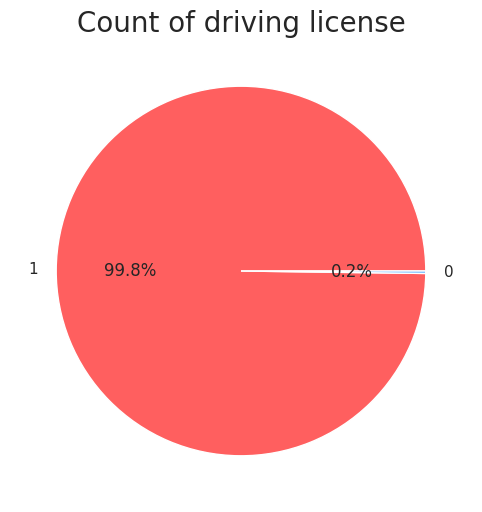

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")

# Plot the pie chart
df1['Driving_License'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF'])

# Customize the plot
plt.title('Count of driving license', fontsize=20)
plt.ylabel('')

# Show the plot
plt.show()


###**conclusion**


**From pie chart we can clearly say that 99.8% i.e majority of people have DL and very less people are not having DL**.




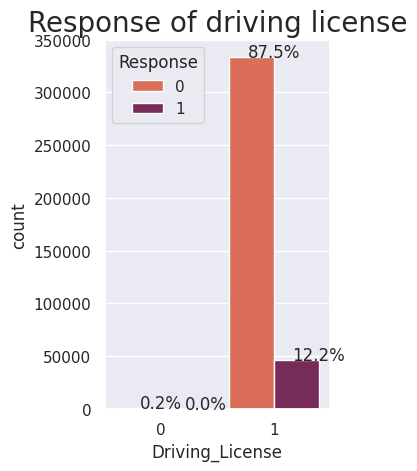

In [25]:
plt.subplot(1,2,2)
total = float(len(df1))
ax2 = sns.countplot(x='Driving_License',hue='Response',palette="rocket_r", data=df)
plt.title('Response of driving license',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

###**conclusion**


**Only a small percentage of people who have a DL (12.2%) are interested in buying insurance**.


##**Vehicle Age**

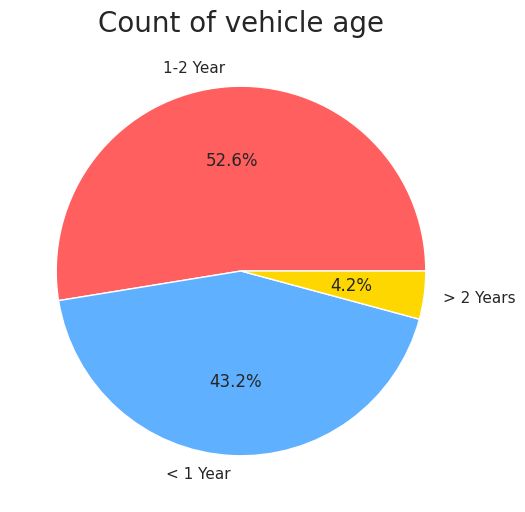

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")

# Calculate the count of each category
vehicle_age_counts = df1['Vehicle_Age'].value_counts()

# Plot the pie chart
vehicle_age_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF', '#FFD700'])

# Customize the plot
plt.title('Count of vehicle age', fontsize=20)
plt.ylabel('')

# Show the plot
plt.show()


###**conclusion**


**Around 43.2% of vehicles are less than one year old.**


**Around 52.6% of vehicles are of 1-2 year old.**

**Around 4.2% of vehicles are of more than 2 year old.**


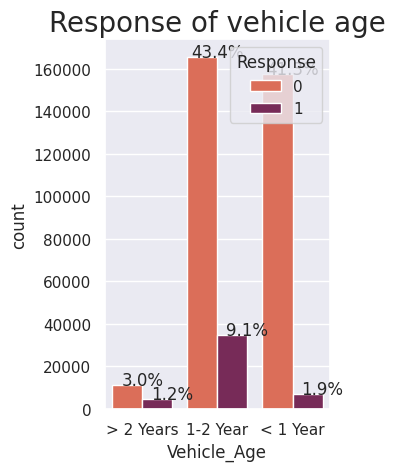

In [27]:
plt.subplot(1,2,2)
total = float(len(df1))
ax2 = sns.countplot(x='Vehicle_Age',hue='Response',palette="rocket_r", data=df)
plt.title('Response of vehicle age',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()


**conclusion**



**Around 1.9% of people are interested in purchasing insurance for vehical under less than one year old.**



**Around 9.1% of people are interested in purchasing insurance for vehical of 1-2 year old.**



**Around 1.2% of people are interested in purchasing insurance for vehical of more than two year old.**



##**Annual Premium**

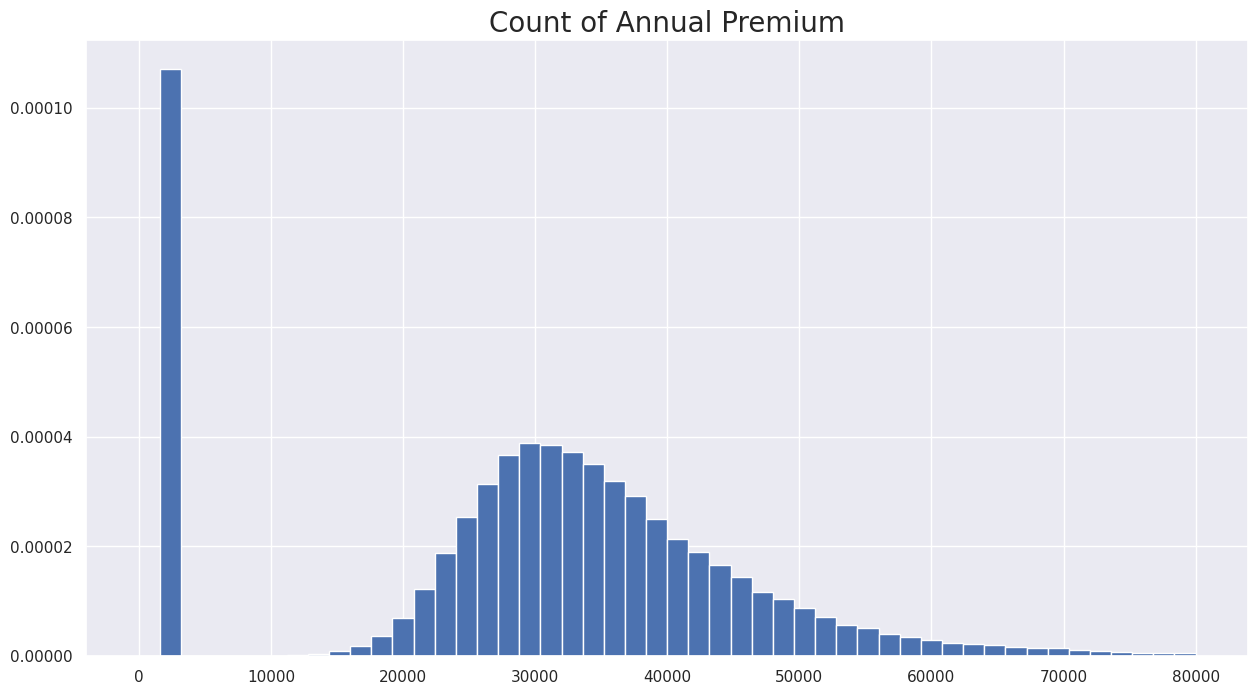

In [28]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
df['Annual_Premium'].hist(figsize=(15,8), bins = 50, density = True, range=[0, 80000])
plt.title('Count of Annual Premium',fontsize=20)
plt.show()


**conclusion**


**From the distribution plot we can infer that the annual premimum variable is right skewed**

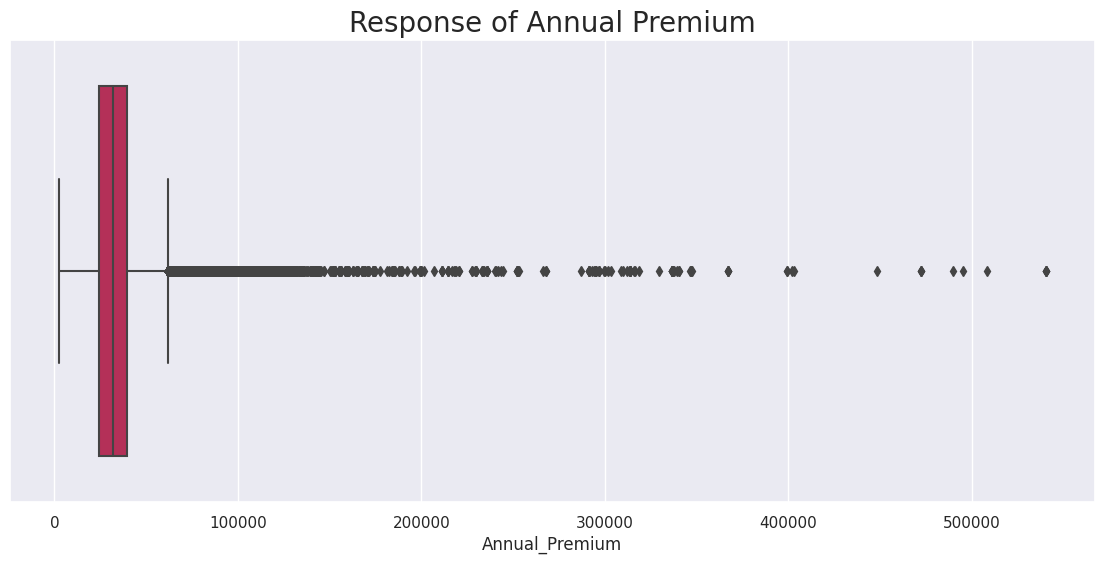

In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Annual_Premium',palette="rocket_r", data=df1)
plt.title('Response of Annual Premium',fontsize=20)
plt.show()

**conclusion**

**From the boxplot we can observe lot of outliers in the variable**

##**Previously Insured**

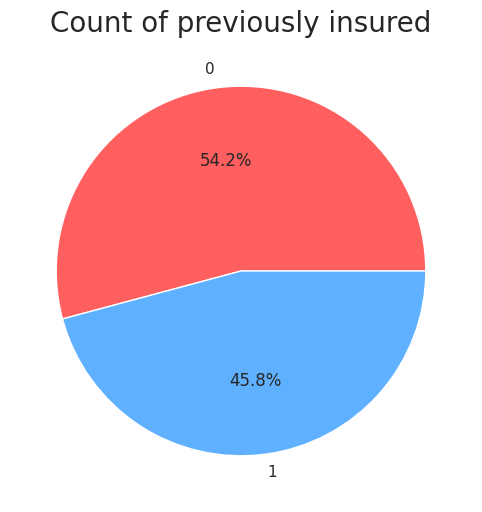

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")

# Calculate the count of each category
previously_insured_counts = df1['Previously_Insured'].value_counts()

# Plot the pie chart
plt.pie(previously_insured_counts, labels=previously_insured_counts.index, autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF'])

# Customize the plot
plt.title('Count of previously insured', fontsize=20)

# Show the plot
plt.show()


**conclusion**


**Around 54.2% of vehicles are insuranced already.**

**Around 45.8% of vehicles are not insuranced**.

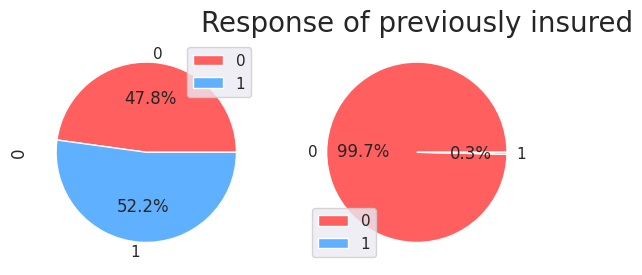

In [31]:
import matplotlib.pyplot as plt

# Calculate the count of each category and response combination
previously_insured_response_counts = df['Response'].groupby(df['Previously_Insured']).value_counts().unstack()

# Plot the pie chart
previously_insured_response_counts.plot.pie(subplots=True, autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF'])

# Customize the plot
plt.title('Response of previously insured', fontsize=20)
plt.ylabel('')  # Remove the ylabel

# Show the plot
plt.show()


**conclusion**


**45.8% people are insured previously, in that 12.2% poeple interested to buy the vehicle insurance againinsurance might be expired or should be renewed**.





##**Vehicle Damage**

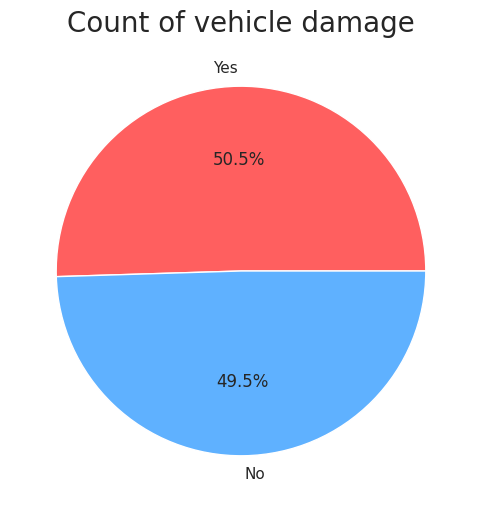

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")

# Calculate the count of each category
vehicle_damage_counts = df1['Vehicle_Damage'].value_counts()

# Plot the pie chart
vehicle_damage_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF5F5F', '#5FB1FF'])

# Customize the plot
plt.title('Count of vehicle damage', fontsize=20)
plt.ylabel('')

# Show the plot
plt.show()


**conclusion**



**The count of damaged and not damaged vehical is almost same**.

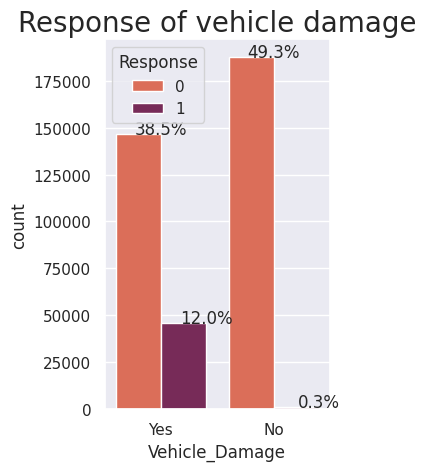

In [33]:
plt.subplot(1,2,2)

total = float(len(df1))
ax2 = sns.countplot(x='Vehicle_Damage',hue='Response',palette="rocket_r", data=df)
plt.title('Response of vehicle damage',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

**conclusion**

**12.0% of people who have had a damaged vehicle in the past want to acquire vehicle insurance**

**0.3% of people who have had a damaged vehicle in the past don't want to acquire vehicle insurance**

##**Vintage**

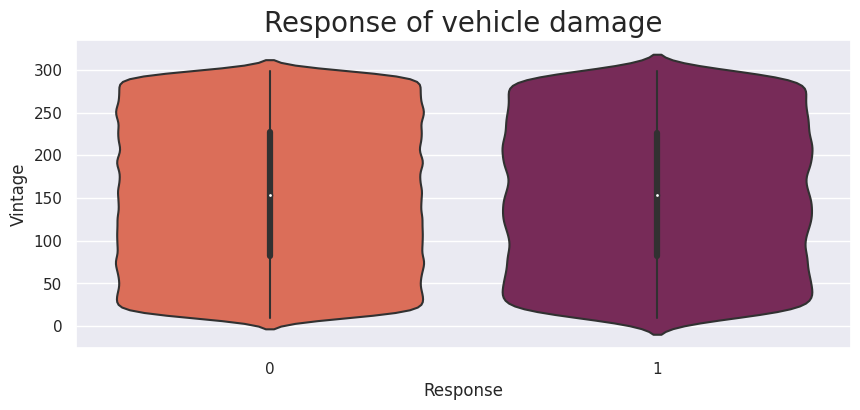

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.set(style="darkgrid")

# Create the violin plot
sns.violinplot(x='Response', y='Vintage', palette='rocket_r', data=df1)

# Customize the plot
plt.title('Response of vehicle damage', fontsize=20)

# Show the plot
plt.show()


**conclusion**

**We can also see that Vintage has an almost uniform distribution from above plot.**


##**Feature encoding:**


In [35]:
df1['Gender'] = df1['Gender'].map({'Female':1, 'Male':0})
df1['Vehicle_Damage'] = df1['Vehicle_Damage'].map({'Yes':1, 'No':0})
df1['Vehicle_Age'] = df1['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})

In [36]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


##**Correlation Matrix**

<Axes: >

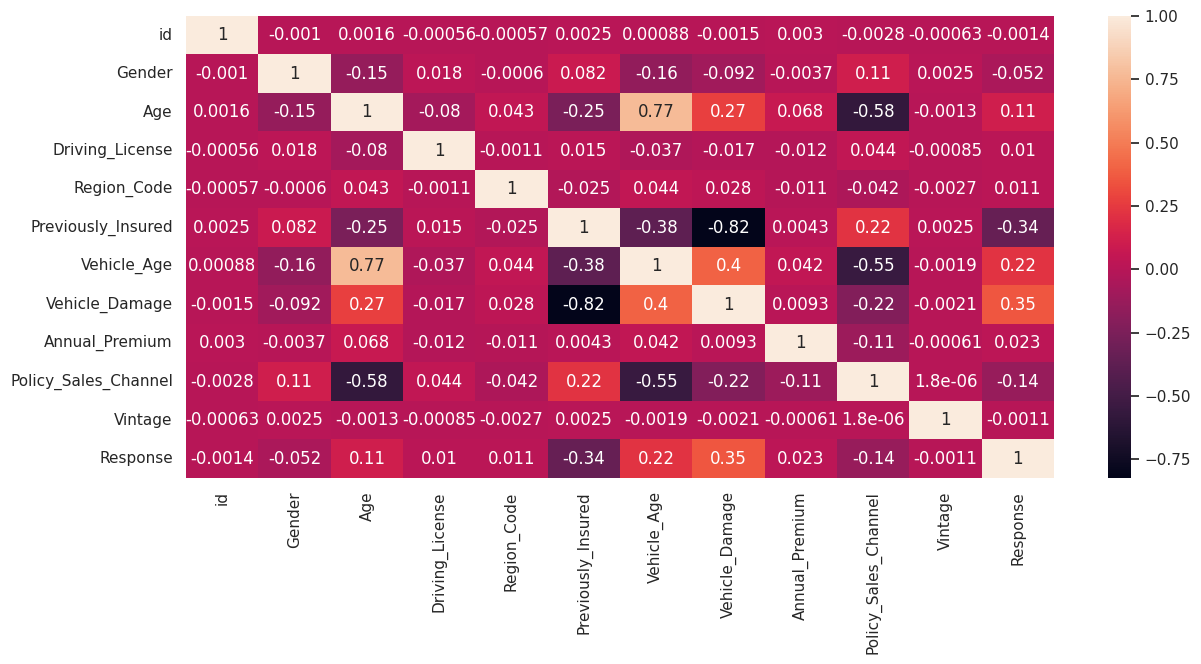

In [37]:
plt.figure(figsize = (14,6))
sns.heatmap(df1.corr(), annot = True)

In [38]:
# Finding Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [39]:
cal_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])


,variables,VIF
0,id,3.977444
1,Gender,1.900514
2,Age,18.417038
3,Driving_License,45.710270
4,Region_Code,4.957024
5,Previously_Insured,5.727639
6,Vehicle_Age,6.033316
7,Vehicle_Damage,6.355455
8,Annual_Premium,4.182873
9,Policy_Sales_Channel,8.083527


##**Finding Outliers**

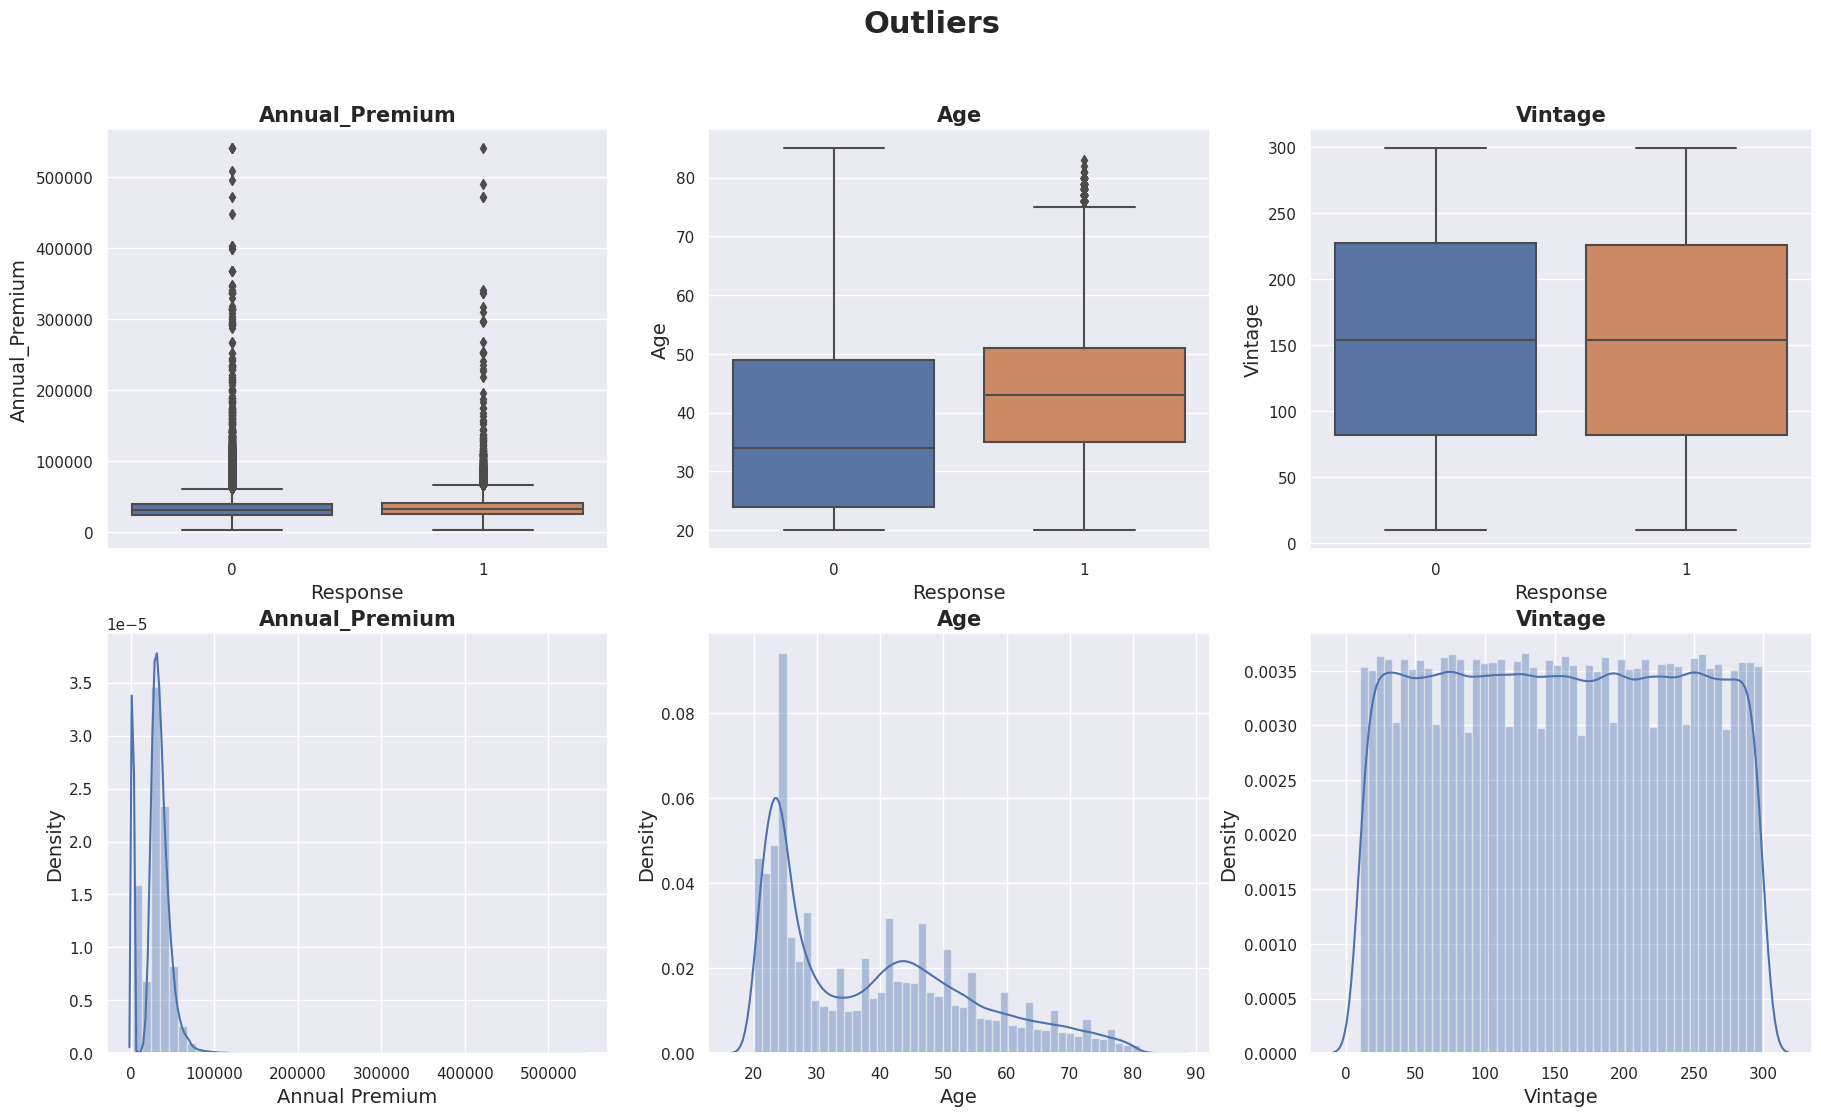

In [40]:
def show_outliers(df1):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df1)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df1)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df1)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df1['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df1['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df1['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(df1)

###**Conclusion**




**1.From above graph we can say that '[Age]' is having some of outliers, but that won't be affectingt our result so we will ignore it** .

**2.From above graph '[Vintage]' is having uniform distribution**.

**3.From the above plot it can be implied that '[Annual Premium]' has a poitively skewed distribution.**


##**Outlier Treatment and Feature Scaling**

**For Outlier treatment we will be applying quantile method.**




**For feature Scaling we will be using MinMaxScaler technique for Normlization.**

In [41]:
def outlier_treatment(df1):
    Q1=df1['Annual_Premium'].quantile(0.25)
    Q3=df1['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df1['Annual_Premium_Treated'] = np.where(df1['Annual_Premium']>Upper_Whisker, Upper_Whisker, df1['Annual_Premium'])

def scale_features(df1):
    scaler = MinMaxScaler()

    df1['Annual_Premium_Treated'] = scaler.fit_transform(df1['Annual_Premium_Treated'].values.reshape(-1,1))
    df1['Vintage_Treated'] = scaler.fit_transform(df1['Vintage'].values.reshape(-1,1))

outlier_treatment(df1)
scale_features(df1)

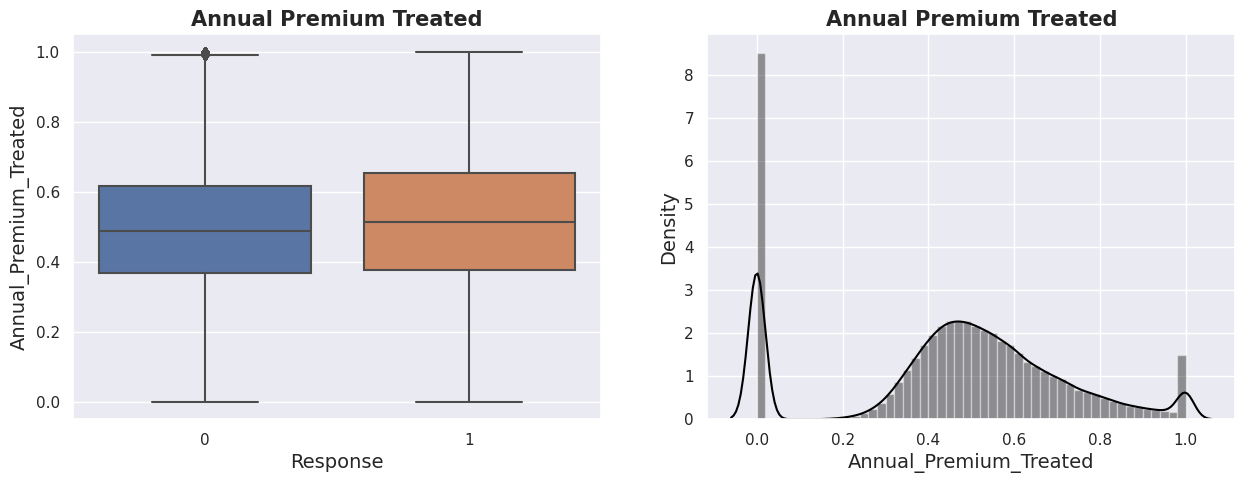

In [42]:
def show_ann_prem_outliers(df1):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df1)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df1['Annual_Premium_Treated'], color='black')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

show_ann_prem_outliers(df1)


###**conclusion**


**From the above plots we can see that there are no more outliers in Annual Premium.All the outliers are sloved**.


##**Functions**

In [43]:
# independent variable
X=df1.drop(columns=['id','Driving_License','Policy_Sales_Channel','Vintage','Response'])
# dependent variable
y = df1['Response']
     

In [44]:
df1.isna()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
# Fill any numerical NaNs with mode()

fill_mode = lambda col: col.fillna(col.mode())
X = X.apply(fill_mode, axis=0)
df1 = df1.apply(fill_mode, axis=0)
     

#**Model Building**

In [46]:
x=df1[['Gender','Age','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage']]
y=df1['Response']

In [47]:
# check for imbalance in data 
df1['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)


In [49]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('the shape of Original dataset is {}'.format(Counter(y)))
print('the shape of Resampled dataset is {}'.format(Counter(y_new)))


After Random Over Sampling Of Minor Class Total Samples are : 668798
the shape of Original dataset is Counter({0: 334399, 1: 46710})
the shape of Resampled dataset is Counter({1: 334399, 0: 334399})


In [50]:
from sklearn.model_selection import train_test_split
train_data , test_data=train_test_split(df1,test_size=0.2)


print("Training data:")
print(train_data.head())

# Show the first few rows of the testing data
print("Testing data:")
print(test_data.head())

Training data:
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
124504  124505       1   25                1         29.0                   1   
320546  320547       0   37                1         41.0                   0   
255363  255364       1   22                1          2.0                   0   
73034    73035       1   24                1         15.0                   1   
305671  305672       1   65                1          3.0                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
124504            0               0         31162.0                 152.0   
320546            1               1         29456.0                  26.0   
255363            0               1         25068.0                 152.0   
73034             0               0         32596.0                 152.0   
305671            1               1         35801.0                 152.0   

        Vintage  Response  Annual_P

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)


In [52]:
X_train.shape

(304887, 9)

In [53]:
X_test.shape

(76222, 9)

In [54]:
y_train.shape

(304887,)

In [55]:
y_test.shape

(76222,)

In [56]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##**Logistic Regression**


In [57]:
#Importing Logistic Regression
logistic_model = LogisticRegression(random_state=30)
logistic_model=logistic_model.fit(X_train,y_train)
#Making prediction
y_pred_lg = logistic_model.predict(X_test)
y_pred_prob_lg = logistic_model.predict_proba(X_test)[:,1]

In [58]:
# Evaluation
RS_lgt= recall_score(y_test, y_pred_lg)
print("Recall_Score : ", RS_lgt)

PS_lgt= precision_score(y_test, y_pred_lg)
print("Precision_Score :",PS_lgt)

f1S_lgt= f1_score(y_test, y_pred_lg)
print("f1_Score :", f1S_lgt)

AS_lgt= accuracy_score(y_pred_lg, y_test)
print("Accuracy_Score :",AS_lgt)

acu_lgt = roc_auc_score(y_pred_lg, y_test)
print("ROC_AUC Score:",acu_lgt)

Recall_Score :  0.0
Precision_Score : 0.0
f1_Score : 0.0
Accuracy_Score : 0.8750098396788328
ROC_AUC Score: 0.4375278805531502


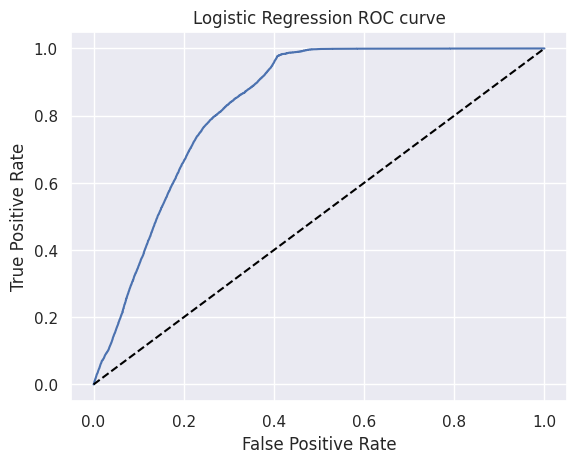

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lg)

plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()
     


###**confusion_matrix**



[[66695     4]
 [ 9523     0]]


<Axes: >

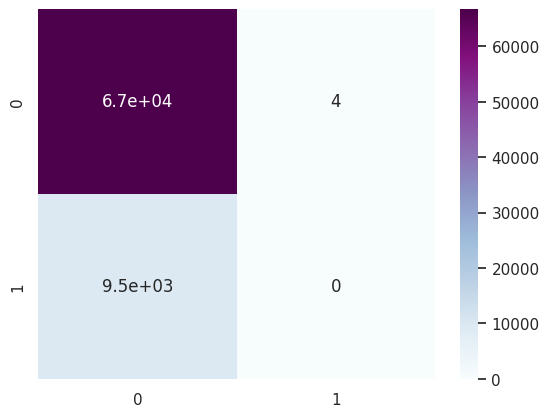

In [60]:
con_matrix= confusion_matrix(y_test, y_pred_lg)
print(con_matrix)
sns.heatmap(con_matrix ,annot=True, cmap='BuPu')

In [61]:
print(classification_report(y_pred_lg, y_test))


              precision    recall  f1-score   support

           0       1.00      0.88      0.93     76218
           1       0.00      0.00      0.00         4

    accuracy                           0.88     76222
   macro avg       0.50      0.44      0.47     76222
weighted avg       1.00      0.88      0.93     76222



##**RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier()
RF_model= RF_model.fit(X_train, y_train)
#Making prediction
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

###**confusion_matrix**


In [ ]:
con_matrix= confusion_matrix(y_test,rf_pred)
print(con_matrix)
sns.heatmap(con_matrix ,annot=True, fmt='g')

In [ ]:
print(classification_report(rf_pred, y_test))


###**Feature Importance**

In [ ]:
plt.figure(figsize=(14,6))
feat_importances = pd.Series(RF_model.feature_importances_, index=X_new.columns)
feat_importances.nlargest(5).plot(kind='bar')


##**XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
XG_model= XGBClassifier()
XG_model= XG_model.fit(X_train, y_train)
#Making prediction
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]
     

In [ ]:
# Evaluation
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)

In [ ]:

fpr, tpr, _ = roc_curve(y_test, XG_prob)

plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()
     

###**confusion matix**

In [ ]:
con_matrix= confusion_matrix(y_test,XG_pred)
print(con_matrix)
sns.heatmap(con_matrix ,annot=True, fmt='g')
     

In [ ]:
print(classification_report(XG_pred, y_test))


###**Feature Importance**

In [ ]:
plt.figure(figsize=(14,6))
feat_importances = pd.Series(XG_model.feature_importances_, index=X_new.columns)
feat_importances.nlargest(5).plot(kind='bar')


##**Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=30)
dt_model=dt_model.fit(X_train, y_train)
#Making prediction
dt_pred = dt_model.predict(X_test)
dt_pred_prob = dt_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
RS_dt= recall_score(y_test, dt_pred)
print("Recall_Score : ", RS_dt)

PS_dt= precision_score(y_test, dt_pred)
print("Precision_Score :",PS_dt)

f1S_dt= f1_score(y_test, dt_pred)
print("f1_Score :", f1S_dt)

AS_dt= accuracy_score(y_test, dt_pred)
print("Accuracy_Score :",AS_dt)

acu_dt = roc_auc_score(y_test, dt_pred)
print("ROC_AUC Score:",acu_dt)

In [ ]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)
plt.title('Decision Tree ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

###**confusion matrix**

In [ ]:
con_matrix= confusion_matrix(y_test,dt_pred)
print(con_matrix)
sns.heatmap(con_matrix ,annot=True, fmt='g')


###**Feature Importance**

In [ ]:
plt.figure(figsize=(14,6))
feat_importances = pd.Series(dt_model.feature_importances_, index=X_new.columns)
feat_importances.nlargest(5).plot(kind='bar')


##**Random Forest**

In [ ]:
#Importing Random Forest
rf_model= RandomForestClassifier(random_state=30)
rf_model= rf_model.fit(X_train, y_train)
#Making prediction
rf_pred= rf_model.predict(X_test)
rf_pred_proba= rf_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
RS_rf= recall_score(y_test, rf_pred)
print("Recall_Score : ", RS_lgt)

PS_rf= precision_score(y_test, rf_pred)
print("Precision_Score :",PS_lgt)

f1S_rf= f1_score(y_test, rf_pred)
print("f1_Score :", f1S_lgt)

AS_rf= accuracy_score(y_test, rf_pred)
print("Accuracy_Score :",AS_lgt)

acu_rf = roc_auc_score(y_test, rf_pred)
print("ROC_AUC Score:",acu_lgt)

In [ ]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

###**confusion matrix**

In [ ]:
con_matrix= confusion_matrix(y_test,rf_pred)
print(con_matrix)
sns.heatmap(con_matrix ,annot=True, fmt='g')

In [ ]:
print(classification_report(rf_pred, y_test))

###**Feature Importance**

In [ ]:
plt.figure(figsize=(14,6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X_new.columns)
feat_importances.nlargest(5).plot(kind='bar')


##**KNN(K-Nearest Neighbors)**

In [ ]:
knn_model=KNeighborsClassifier()
knn_model=knn_model.fit(X_train,y_train)
#Making prediction
knn_pred = knn_model.predict(X_test)
knn_pred_prob = knn_model.predict_proba(X_test)[:,1]

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn.predict(X_test)

# Calculate the evaluation metrics
RS_knn = recall_score(y_test, knn_pred)
print("Recall Score:", RS_knn)

PS_knn = precision_score(y_test, knn_pred)
print("Precision Score:", PS_knn)

f1S_knn = f1_score(y_test, knn_pred)
print("F1 Score:", f1S_knn)

AS_knn = accuracy_score(y_test, knn_pred)
print("Accuracy Score:", AS_knn)

acu_knn = roc_auc_score(y_test, knn_pred)
print("ROC AUC Score:", acu_knn)


In [ ]:
fpr, tpr, _ = roc_curve(y_test, knn_pred_prob)
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

###**confusion matrix**

In [ ]:
con_matrix= confusion_matrix(y_test,knn_pred)
print(con_matrix)
sns.heatmap(con_matrix ,annot=True, fmt='g')

In [ ]:
print(classification_report(knn_pred, y_test))

##**Gradient Boosting**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier(random_state=30)
GB_model=GB_model.fit(X_train,y_train)
#Making prediction
GB_pred = GB_model.predict(X_test)
GB_pred_prob = GB_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
RS_GB= recall_score(y_test, GB_pred)
print("Recall_Score : ", RS_GB)

PS_GB= precision_score(y_test, GB_pred)
print("Precision_Score :",PS_GB)

f1S_GB= f1_score(y_test, GB_pred)
print("f1_Score :", f1S_GB)

AS_GB= accuracy_score(y_test, GB_pred)
print("Accuracy_Score :",AS_GB)

acu_GB = roc_auc_score(y_test, GB_pred)
print("ROC_AUC Score:",acu_GB)


In [ ]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, GB_pred_prob)
plt.title('Gradient Boosting ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

###**confusion matrix**

In [ ]:
con_matrix= confusion_matrix(y_test,GB_pred)
print(con_matrix)
sns.heatmap(con_matrix ,annot=True, fmt='g')

In [ ]:
print(classification_report(GB_pred, y_test))

##**XGBoost**

In [ ]:
XG_model= XGBClassifier(random_state=30)
XG_model= XG_model.fit(X_train, y_train)
#Making prediction
XG_pred = XG_model.predict(X_test)
XG_pred_prob = XG_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
RS_XG= recall_score(y_test, XG_pred)
print("Recall_Score : ", RS_XG)

PS_XG= precision_score(y_test, XG_pred)
print("Precision_Score :",PS_XG)

f1S_XG= f1_score(y_test, XG_pred)
print("f1_Score :", f1S_XG)

AS_XG= accuracy_score(y_test, XG_pred)
print("Accuracy_Score :",AS_XG)

acu_XG = roc_auc_score(y_test, XG_pred)
print("ROC_AUC Score:",acu_XG)

In [ ]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, XG_pred_prob)
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

###**confusion matrix**

In [ ]:
con_matrix= confusion_matrix(y_test,XG_pred)
print(con_matrix)
sns.heatmap(con_matrix ,annot=True, fmt='g')

In [ ]:
print(classification_report(XG_pred, y_test))

##**LightBGM**

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier, reset_parameter
lgbm_model=LGBMClassifier(random_state=30)
lgbm_model=lgbm_model.fit(X_train,y_train)
#Making prediction
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred_prob = lgbm_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation
RS_lgbm= recall_score(y_test, lgbm_pred)
print("Recall_Score : ", RS_lgbm)

PS_lgbm= precision_score(y_test, lgbm_pred)
print("Precision_Score :",PS_lgbm)

f1S_lgbm= f1_score(y_test, lgbm_pred)
print("f1_Score :", f1S_lgbm)

AS_lgbm= accuracy_score(y_test, lgbm_pred)
print("Accuracy_Score :",AS_lgbm)

acu_lgbm = roc_auc_score(y_test, lgbm_pred)
print("ROC_AUC Score:",acu_lgbm)


In [ ]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, lgbm_pred_prob)
plt.title('lbgm ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

###**confusion matrix**

In [ ]:
con_matrix= confusion_matrix(y_test,lgbm_pred)
print(con_matrix)
sns.heatmap(con_matrix ,annot=True, fmt='g')

In [ ]:
print(classification_report(lgbm_pred, y_test))

#**Result of all models**

In [ ]:
list_of_model = ['Logistic Regression','RandomForest Classifier','XGBClassifier','Decision Tree ','Random Forest','KNN','Gradient Boosting','Extreme Gradient Boosting','LGBM']


In [ ]:
result_list_Recall_Score = [RS_lgt,r_rf,r_XG,RS_dt,RS_rf,RS_knn,RS_GB,RS_XG,RS_lgbm]
result_list_Precision_Score = [PS_lgt,p_rf,p_XG,RS_dt,PS_rf,PS_knn,PS_GB,PS_XG,PS_lgbm]
result_list_f1_Score = [f1S_lgt,f1_rf,f1_XG,f1S_dt,f1S_rf,f1S_knn,f1S_GB,f1S_XG,f1S_lgbm]
result_list_Accuracy_Score = [AS_lgt,A_rf,A_XG,AS_dt,AS_rf,AS_knn,AS_GB,AS_XG,AS_lgbm]
relust_list_ROC_Acu_Score=[acu_lgt,acu_rf,acu_XG,acu_dt,acu_rf,acu_knn,acu_GB,acu_XG,acu_lgbm]

In [ ]:
# creating an empty dataframe
results_df = pd.DataFrame()

In [ ]:
results_df['model_name'] = list_of_model
results_df['Recall_Score'] = result_list_Recall_Score
results_df['Precision_Score'] = result_list_Precision_Score
results_df['f1_Score'] = result_list_f1_Score
results_df['Accuracy_Score'] = result_list_Accuracy_Score
results_df['ROC_AUC Score'] = relust_list_ROC_Acu_Score

In [ ]:
results_df.style.hide_index().format()

#**Conclusion**